# Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
import numpy as nd

In [2]:
mnist = fetch_openml('mnist_784')

In [10]:
x, y = mnist['data'] , mnist['target']

In [11]:
x.shape #this is one d array

(70000, 784)

In [12]:
y.shape

(70000,)

In [13]:
%matplotlib inline

In [14]:
import matplotlib
import matplotlib.pyplot as plt

In [15]:
x.to_numpy()
print(type(x), x.shape)


<class 'pandas.core.frame.DataFrame'> (70000, 784)


In [18]:
some_digit = x.to_numpy ()[36001]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

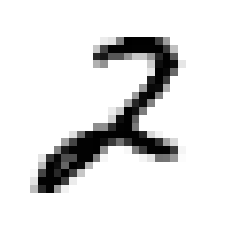

In [20]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary , interpolation="nearest")
plt.axis("off")

In [21]:
y[36001]  #to check the label

'2'

In [22]:
x_train , x_test = x[:60000] , x[60000:]

In [23]:
y_train , y_test = y[:60000] , x[60000:]

# Creating a 2 detector

In [35]:
y_train = y_train.astype(np.int8)  #converting strings to integer of Y_train and y_test
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)    #created a 2 detector if the digit is 2 then gives True otherwise false
y_test_2 = (y_test==2)

In [42]:
y_train_2.to_numpy()        #gives many false because the probality of 2 occur is only 10%

array([False, False, False, ..., False, False, False])

# Using a classifier

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression(tol=0.1)  # Tolerance used to fast the output 

In [45]:
clf.fit(x_train,y_train_2)

c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
clf.predict([some_digit])

array([ True])

# Crossvalidation

In [49]:
from sklearn.model_selection import cross_val_score    #if we give cv=3 then he make 3,3 crossvalidation make one test and train at other

In [52]:
a=cross_val_score(clf, x_train , y_train_2 , cv=3 , scoring="accuracy")

c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\pyhton 39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [53]:
a.mean()  #show our accuracy

0.9781